# Predict calories burned during workout

https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

In [2]:
!pip install -r ../requirements.txt

You should consider upgrading via the 'D:\projects\gei-duo\meinf-ai-wp-01\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm # DO NOT REMOVE

%matplotlib inline

In [5]:
DEEPNOTE = os.environ.get("DEEPNOTE_PROJECT_ID")

PROJECT_PATH = Path("/work/meinf_ai_wp_01") if DEEPNOTE else Path.joinpath(Path.cwd(), '..')
DATA_PATH = PROJECT_PATH / "data"
CSV_PATH = DATA_PATH / "gym_members_exercise_tracking.csv"

In [6]:
df = pd.read_csv(CSV_PATH)
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


## Column name 'normalizing'

In [7]:
def normalize_name(name: str) -> str:
    """
        Normalize given name into lowercase separated by underscores
        and removing the measurements.

    Args:
        name (str): column name to normalize

    Returns:
        str: normalized name
    """

    return name.lower().split("(")[0].strip().replace(" ", "_")


df.columns = df.columns.map(normalize_name)
df.columns

Index(['age', 'gender', 'weight', 'height', 'max_bpm', 'avg_bpm',
       'resting_bpm', 'session_duration', 'calories_burned', 'workout_type',
       'fat_percentage', 'water_intake', 'workout_frequency',
       'experience_level', 'bmi'],
      dtype='object')

## EDA

In [8]:
from ydata_profiling import ProfileReport

ProfileReport(df, title="Profiling Report").to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Correlation

In [20]:
categorical_df = df.select_dtypes(include=["object"])

categorical_df.describe()

,Gender,Workout_Type
count,973,973
unique,2,4
top,Male,Strength
freq,511,258


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
encoder = OrdinalEncoder()

encoded_df = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)
encoded_df.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,38.0,1.0,375.0,21.0,20.0,37.0,10.0,117.0,550.0,3.0,23.0,20.0,2.0,2.0,605.0
1,28.0,0.0,273.0,3.0,19.0,31.0,16.0,78.0,289.0,1.0,227.0,6.0,2.0,1.0,654.0
2,14.0,0.0,214.0,16.0,7.0,2.0,4.0,59.0,137.0,0.0,222.0,8.0,2.0,1.0,395.0
3,7.0,1.0,83.0,20.0,30.0,44.0,6.0,9.0,70.0,2.0,176.0,6.0,1.0,0.0,143.0
4,20.0,1.0,35.0,29.0,28.0,38.0,18.0,14.0,78.0,2.0,180.0,13.0,1.0,0.0,23.0


### Pearson correlation heatmap

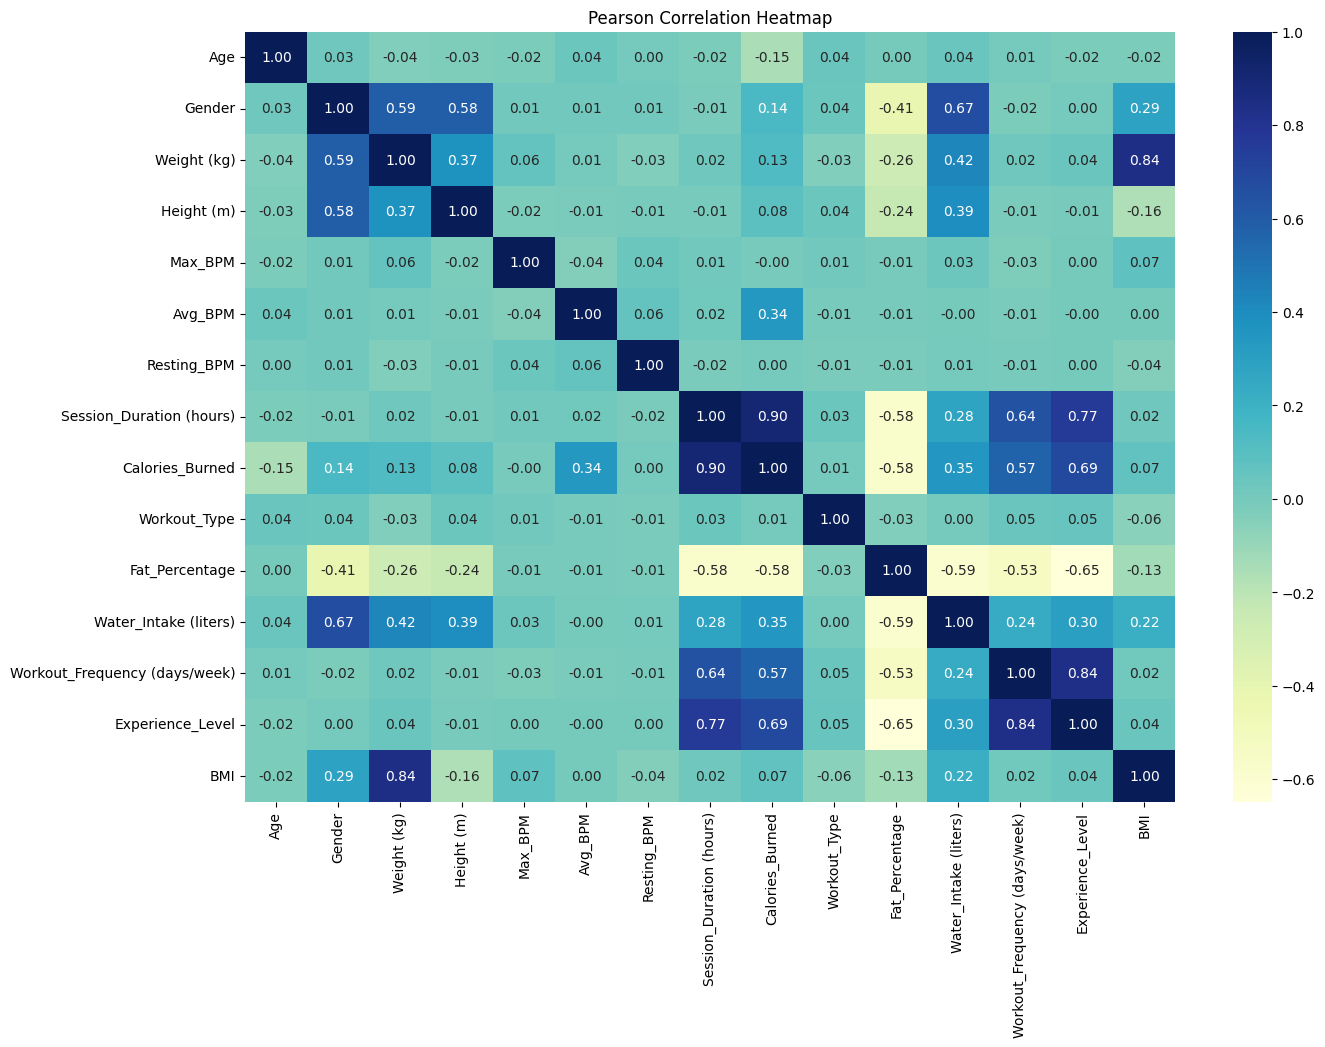

In [ ]:
sns.heatmap(encoded_df.corr(method="pearson"), cmap="YlGnBu", annot=True, fmt=".2f")

plt.title("Pearson Correlation Heatmap")
plt.show()

### Spearman correlation heatmap

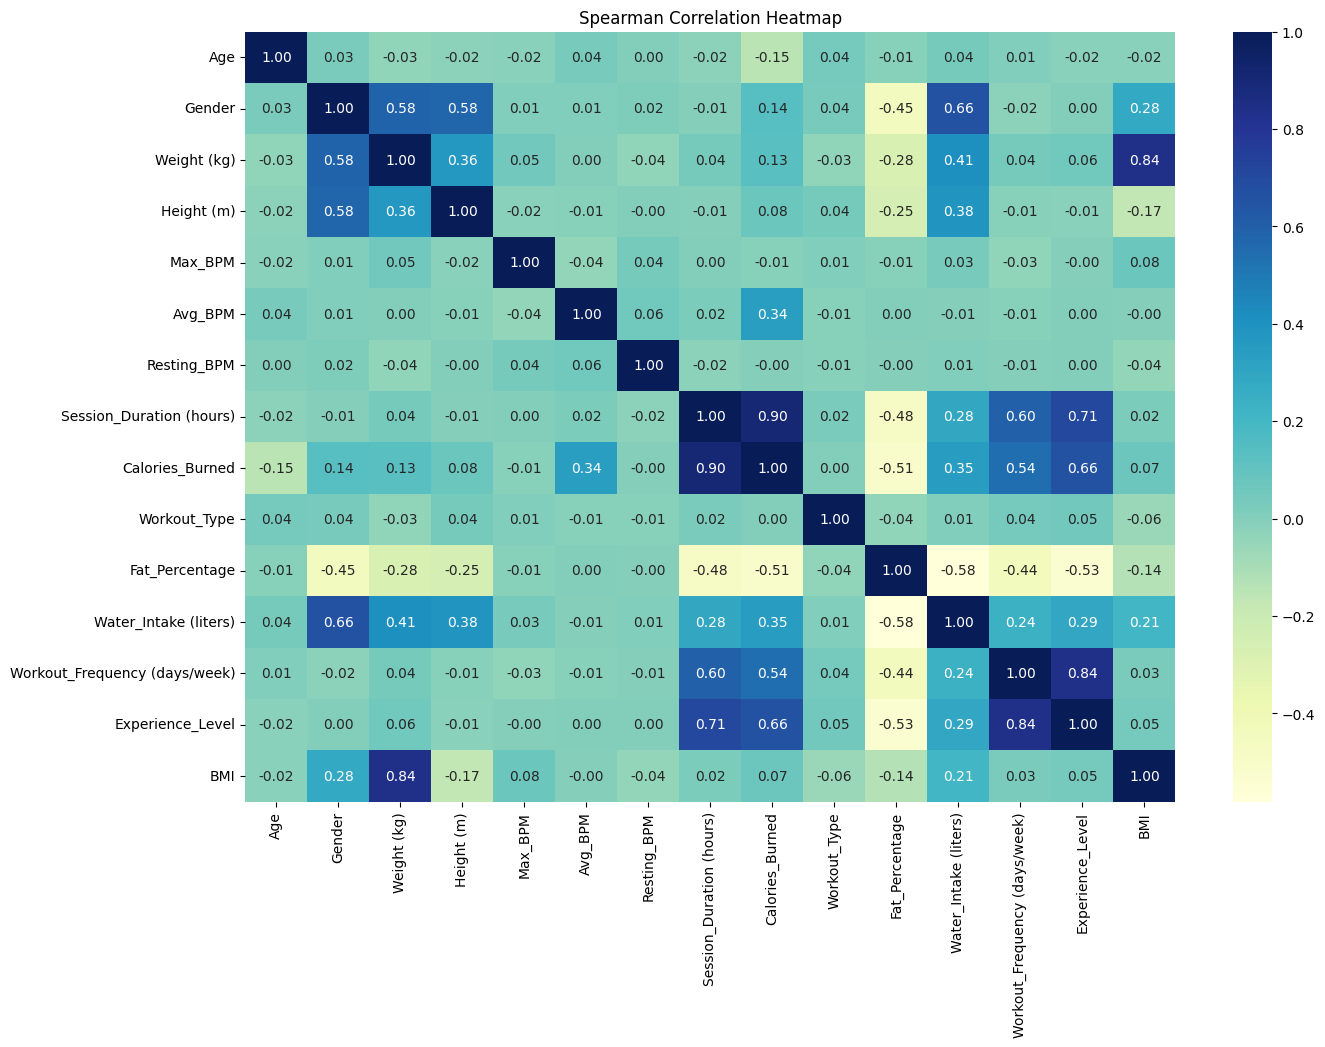

In [26]:
sns.heatmap(encoded_df.corr(method="spearman"), cmap="YlGnBu", annot=True, fmt=".2f")

plt.title("Spearman Correlation Heatmap")
plt.show()

## Feature Engineering

### Feature creation

In [33]:
# Show missing values
_null = df.isnull().sum()

print(_null[_null > 0] if any(_null) else "No missing values")

No missing values


### Feature transformation

### Feature encoding

### Feature scaling

In [ ]:
# Scaling and normalization
from sklearn.preprocessing import StandardScaler

_scaler = StandardScaler()

scaled_df = pd.DataFrame(_scaler.fit_transform(df), columns=encoded_df.columns)

# Dimensionality reduction
scaled_df.head(5)

### Feature selection

### Feature extraction

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d9b716da-a519-4d40-8a21-438227d42336' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>